In [2]:
%reload_ext autoreload
%autoreload 2

# Módulos propios
from utils.filefinder import getFilesFromDirectory
from imgproc.bboxes import Bbox

# Módulos externos
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [3]:
directory = "Gotas_01/"
list_files, list_filenames = getFilesFromDirectory(directory, ".jpg")

In [ ]:
list_df = []
for file, filename in zip(list_files, list_filenames):
    df = Bbox().getDataFrameForImg(file, filename, sdk=-1, minarea=250)
    list_df.append(df)

# Concatenate all dataframes into one
general_df = pd.concat(list_df, ignore_index=True)

# Save the dataframe to a CSV file
general_df.to_csv("bboxes.csv", index=False)

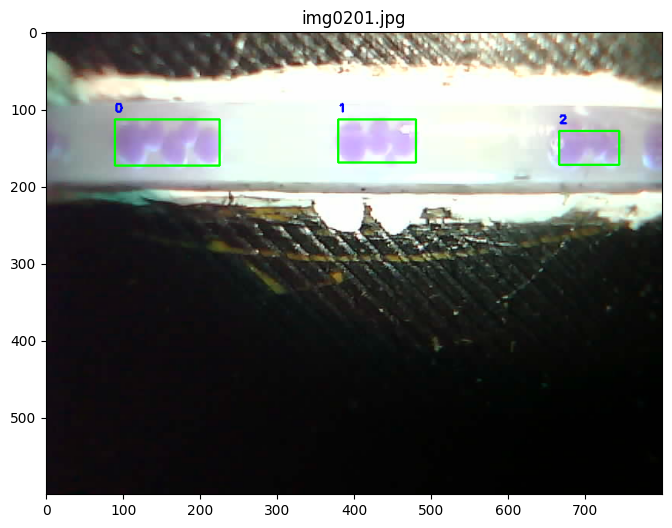

In [6]:
index = 200

test_img = cv2.imread(list_files[index]) # Imagen BGR
bboxes, masks = Bbox().getBoundingBoxesForImg(test_img, sdk=-1, minarea=250)

rgb_img_copy = test_img.copy()

if len(bboxes) == 0:
    rgb_img_copy = test_img
else:
    for i, bbox in enumerate(bboxes):
        cv2.rectangle(rgb_img_copy, bbox[0], bbox[1], (0, 255, 0), 2)
        cv2.putText(rgb_img_copy, str(i), (bbox[0][0], bbox[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

figure, ax = plt.subplots(figsize=(12, 6))
plt.imshow(rgb_img_copy)
plt.title(f"{list_filenames[index]}")
plt.show()